In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
import joblib
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('E:\Computer Science\Projects\Senior Year - Term 1\DeepLearning-NeuralNetworksAssignments\Single Layer Perceptron\penguins.csv')
dataset.shape

(150, 6)

In [3]:
dataset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [4]:
dataset.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               6
body_mass_g          0
dtype: int64

Since the null values are small and in one feature only, we can make a predictive machine learning model that can classify the gender based on the other features and the label (species) after we process the other features for the best learning, also we can train it only on the species of type Adelie and Gentoo as the null values exist only in them 

In [5]:
dataset['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
mask = dataset['gender'].isnull()==True
nullEntries = dataset[mask]

In [7]:
nullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
8,Adelie,34.1,18.1,193,NaN,3475
9,Adelie,42.0,20.2,190,NaN,4250
10,Adelie,37.8,17.1,186,NaN,3300
11,Adelie,37.8,17.3,180,NaN,3700
47,Adelie,37.5,18.9,179,NaN,2975
76,Gentoo,44.5,14.3,216,NaN,4100


Checking data normality in python: https://www.youtube.com/watch?v=12qn03Ml87E

Perform data transformation for normality: https://www.youtube.com/watch?v=xOZ3DxybQKc 

All the features are skewed and have a negative kurtosis but feature (bill_length) is the closest to normal distribution

In [8]:
numericalFeatures=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']

In [9]:
def getAndVisualizeSkewness(feature):
    print("Visualizing feature {feature}".format(feature=feature))
    plt.hist(dataset[feature])
    plt.show()
    print("{feature} is skewed by {skew}".format(feature = feature, skew = stats.skew(dataset[feature])))
    print("{feature}'s kurtosis is {kurtosis}".format(feature=feature,kurtosis=stats.kurtosis(dataset['bill_length_mm'])))
    print('-'*40)

Visualizing feature bill_length_mm


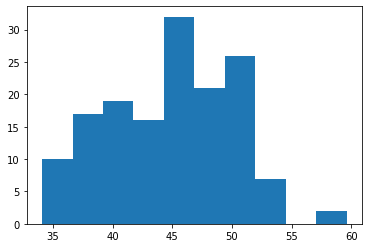

bill_length_mm is skewed by -0.06641719610055938
bill_length_mm's kurtosis is -0.6742701075458375
----------------------------------------
Visualizing feature bill_depth_mm


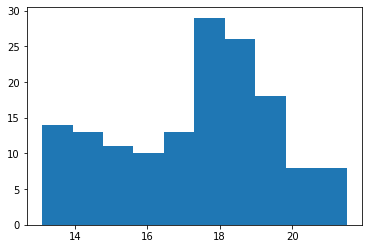

bill_depth_mm is skewed by -0.27593119719466996
bill_depth_mm's kurtosis is -0.6742701075458375
----------------------------------------
Visualizing feature flipper_length_mm


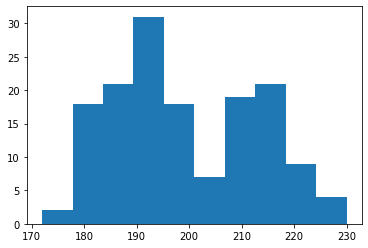

flipper_length_mm is skewed by 0.2560871930501646
flipper_length_mm's kurtosis is -0.6742701075458375
----------------------------------------
Visualizing feature body_mass_g


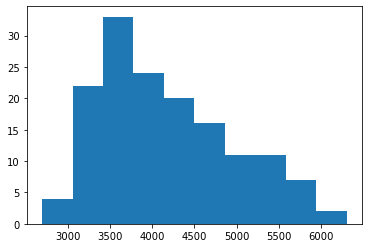

body_mass_g is skewed by 0.6280893933409006
body_mass_g's kurtosis is -0.6742701075458375
----------------------------------------


In [10]:
for feature in numericalFeatures:
    getAndVisualizeSkewness(feature)

All of these transformation functions will also result in a skewed data, so another solution is to transform according to different measures,

body mass is in grams -> convert to kilograms

flipper length in millimeters -> convert to meters

scaling would not affect skewness, but at least all the numbers will be in the same range

In [11]:
def transform(feature):
    print("{0}".format(feature))
    transformedFeature = dataset[feature].transform([np.sqrt,np.log,np.reciprocal])
    transformedFeature.hist(layout=(2,2),figsize=(8,8))
    plt.show()
    print('-'*40)

bill_length_mm


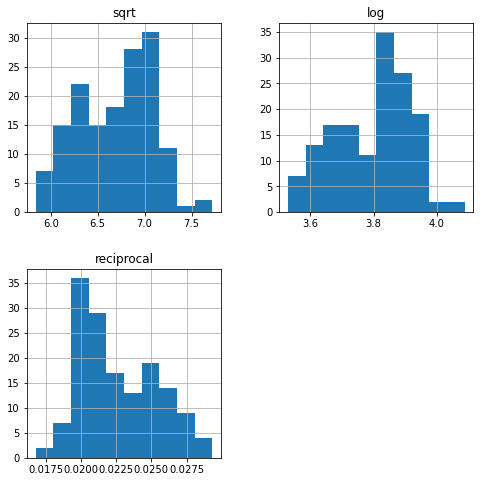

----------------------------------------
bill_depth_mm


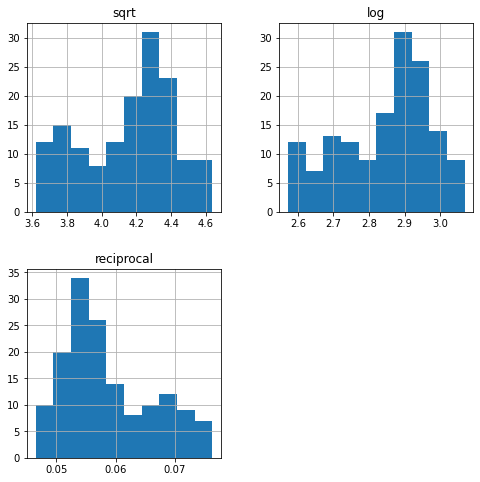

----------------------------------------
flipper_length_mm


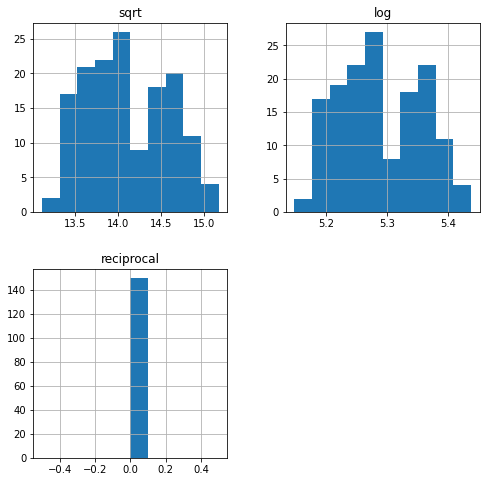

----------------------------------------
body_mass_g


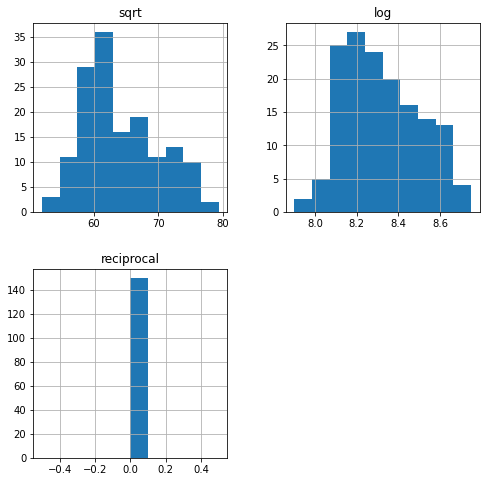

----------------------------------------


In [12]:
for feature in numericalFeatures:
    transform(feature)

Changing body mass from grams -> kilograms

Changing flipper length, bill length, bill depth from milimeters - > centimeters  

In [13]:
dataset['body_mass_g'] = dataset['body_mass_g']/1000
dataset['flipper_length_mm'] = dataset['flipper_length_mm']/10
dataset['bill_length_mm'] = dataset['bill_length_mm']/10
dataset['bill_depth_mm'] =dataset['bill_depth_mm']/10


In [14]:
dataset.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,3.91,1.87,18.1,male,3.75
1,Adelie,3.95,1.74,18.6,female,3.80
2,Adelie,4.03,1.80,19.5,female,3.25
3,Adelie,3.96,1.77,18.6,female,3.50
4,Adelie,3.67,1.93,19.3,female,3.45


In [15]:
speciesWithNullEntriesMask = dataset['species'] != 'Chinstrap'
speciesWithNullEntries = dataset[speciesWithNullEntriesMask]
speciesWithNullEntries.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,3.91,1.87,18.1,male,3.75
1,Adelie,3.95,1.74,18.6,female,3.80
2,Adelie,4.03,1.80,19.5,female,3.25
3,Adelie,3.96,1.77,18.6,female,3.50
4,Adelie,3.67,1.93,19.3,female,3.45


In [16]:
nullEntries = speciesWithNullEntries[mask]
nullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
8,Adelie,3.41,1.81,19.3,NaN,3.475
9,Adelie,4.20,2.02,19.0,NaN,4.250
10,Adelie,3.78,1.71,18.6,NaN,3.300
11,Adelie,3.78,1.73,18.0,NaN,3.700
47,Adelie,3.75,1.89,17.9,NaN,2.975
76,Gentoo,4.45,1.43,21.6,NaN,4.100


In [17]:
nullEntriesIndex = nullEntries.index
nullEntriesIndex

Int64Index([8, 9, 10, 11, 47, 76], dtype='int64')

In [18]:
speciesWithNullEntries['species'] = [1 if species =='Adelie' else 0 for species in speciesWithNullEntries['species']]
nullEntries['species'] =  [1 if species =='Adelie' else 0 for species in nullEntries['species']]
speciesWithNullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,1,3.91,1.87,18.1,male,3.75
1,1,3.95,1.74,18.6,female,3.80
2,1,4.03,1.80,19.5,female,3.25
3,1,3.96,1.77,18.6,female,3.50
4,1,3.67,1.93,19.3,female,3.45
...,...,...,...,...,...,...
95,0,4.36,1.39,21.7,female,4.90
96,0,4.55,1.39,21.0,female,4.20
97,0,5.05,1.59,22.5,male,5.40
98,0,4.49,1.33,21.3,female,5.10


In [19]:
speciesWithNullEntries.drop(index=nullEntriesIndex, axis=0,inplace=True)

In [20]:
speciesWithNullEntries.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               0
body_mass_g          0
dtype: int64

In [21]:
speciesWithNullEntries['gender'] = [1 if gender=='female' else 0 for gender in speciesWithNullEntries['gender']]

In [22]:
genderModel = LogisticRegression()
y_train = speciesWithNullEntries['gender']
x_train = speciesWithNullEntries.drop(columns=['gender'],axis=1)
x_test = nullEntries.drop(columns=['gender'],axis=1)
x_test

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
8,1,3.41,1.81,19.3,3.475
9,1,4.20,2.02,19.0,4.250
10,1,3.78,1.71,18.6,3.300
11,1,3.78,1.73,18.0,3.700
47,1,3.75,1.89,17.9,2.975
76,0,4.45,1.43,21.6,4.100


In [23]:
genderModel.fit(x_train,y_train)
y_train_predicted = genderModel.predict(x_train)
print("the accuracy is {0}".format(accuracy_score(y_train,y_train_predicted)))
y_test = genderModel.predict(x_test)
y_test

the accuracy is 0.9042553191489362


array([1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
joblib.dump(genderModel,"genderModel.h5")

['genderModel.h5']

In [25]:
nullEntries['gender'] = y_test

In [26]:
speciesWithNullEntries = speciesWithNullEntries.append([nullEntries])
speciesWithNullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,1,3.91,1.87,18.1,0,3.750
1,1,3.95,1.74,18.6,1,3.800
2,1,4.03,1.80,19.5,1,3.250
3,1,3.96,1.77,18.6,1,3.500
4,1,3.67,1.93,19.3,1,3.450
...,...,...,...,...,...,...
9,1,4.20,2.02,19.0,0,4.250
10,1,3.78,1.71,18.6,1,3.300
11,1,3.78,1.73,18.0,1,3.700
47,1,3.75,1.89,17.9,1,2.975


In [27]:
speciesWithNullEntries['species'] = ['Adelie' if species ==1 else 'Gentoo' for species in speciesWithNullEntries['species']]
speciesWithNullEntries ['gender']= ['female' if gender==1 else 'male' for gender in speciesWithNullEntries['gender']]

In [28]:
speciesWithNullEntries

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,3.91,1.87,18.1,male,3.750
1,Adelie,3.95,1.74,18.6,female,3.800
2,Adelie,4.03,1.80,19.5,female,3.250
3,Adelie,3.96,1.77,18.6,female,3.500
4,Adelie,3.67,1.93,19.3,female,3.450
...,...,...,...,...,...,...
9,Adelie,4.20,2.02,19.0,male,4.250
10,Adelie,3.78,1.71,18.6,female,3.300
11,Adelie,3.78,1.73,18.0,female,3.700
47,Adelie,3.75,1.89,17.9,female,2.975


In [29]:
chinstrap = dataset[dataset['species']=='Chinstrap']
processedDataset = pd.DataFrame()
processedDataset = processedDataset.append([speciesWithNullEntries,chinstrap])
processedDataset['gender'] = [1 if gender =='female' else 0 for gender in processedDataset['gender']]
processedDataset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,3.91,1.87,18.1,0,3.750
1,Adelie,3.95,1.74,18.6,1,3.800
2,Adelie,4.03,1.80,19.5,1,3.250
3,Adelie,3.96,1.77,18.6,1,3.500
4,Adelie,3.67,1.93,19.3,1,3.450
...,...,...,...,...,...,...
145,Chinstrap,5.08,1.85,20.1,0,4.450
146,Chinstrap,5.01,1.79,19.0,1,3.400
147,Chinstrap,4.90,1.96,21.2,0,4.300
148,Chinstrap,5.15,1.87,18.7,0,3.250


In [30]:
processedDataset.isna().sum()

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               0
body_mass_g          0
dtype: int64

In [31]:
processedDataset.to_csv("processed-penguins.csv",index = False)